# a6-bonus
This assignment is following Chapter **9** - Excercise **4** in the textbook and involves **a simulated two-class** dataset.

4. Generate a simulated two-class data set with 100 observations and
 two features in which there is a visible but non-linear separation be
tween the two classes. Show that in this setting, a support vector
 machine with a polynomial kernel (with degree greater than 1) or a
 radial kernel will outperform a support vector classifier on the train
ing data. Which technique performs best on the test data? Make
 plots and report training and test error rates in order to back up
 your assertions.

# Import Libraries

In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load/ Create Data

In [2]:
X, y = make_moons(n_samples=100, noise=0.1, random_state=42) # make moons is non-linearly separable

# Train Data

In [23]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# linear SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)


# polynomial SVM
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train, y_train)

# rbf SVM
svm_rbf = SVC(kernel='rbf', gamma="scale", C=1)
svm_rbf.fit(X_train, y_train)


SVC(C=1)

In [26]:
# evaluate models
models = [svm_linear, svm_poly, svm_rbf]
for model in models:
    print(f'Model: {model.kernel}')
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    print(f'Train error: {train_error:.2f}')
    print(f'Test error: {test_error:.2f}')
    print()



Model: linear
Train error: 0.14
Test error: 0.13

Model: poly
Train error: 0.09
Test error: 0.13

Model: rbf
Train error: 0.00
Test error: 0.03



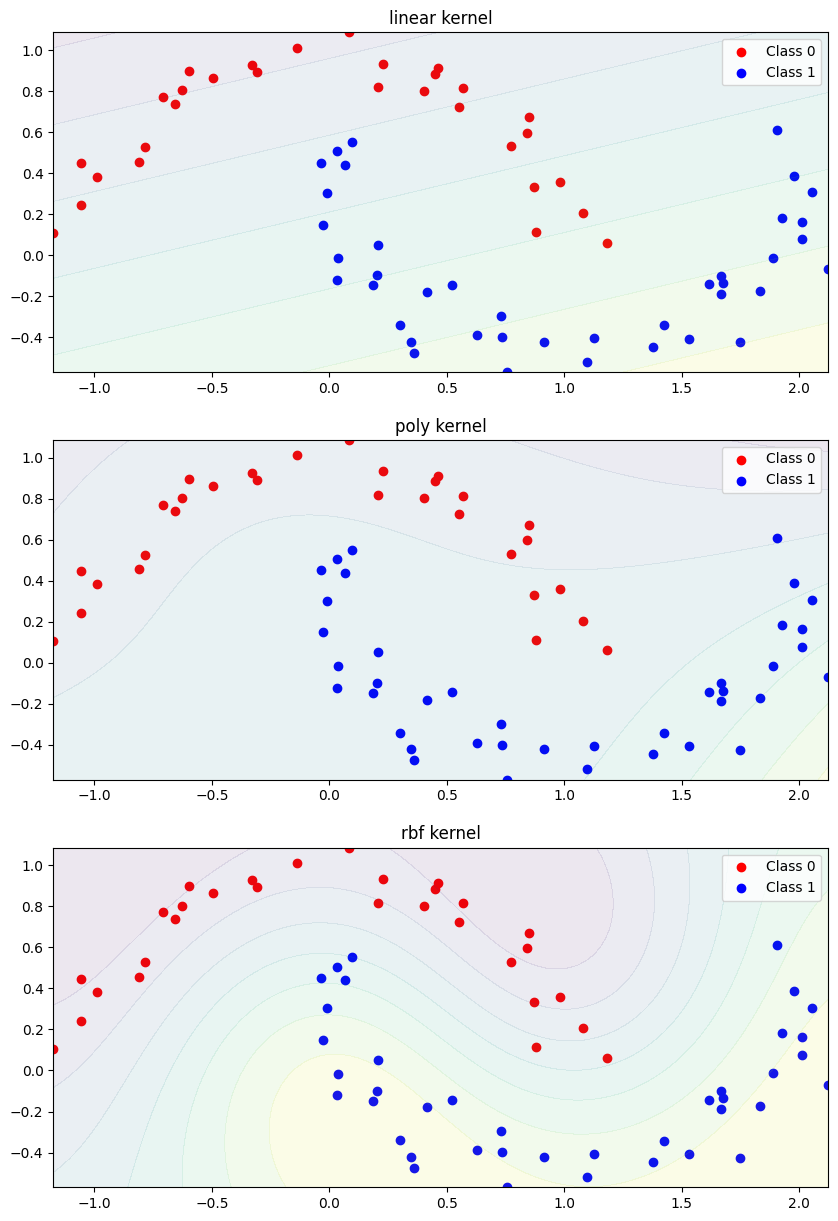

In [27]:
# plot decision boundary
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
axes = axes.ravel()

for i, model in enumerate(models):
    ax = axes[i]
    ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
    ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
    ax.set_title(f'{model.kernel} kernel')
    xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100),
                         np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.1)
    ax.legend()
plt.show()

# Discussion

The radial kernel outperforms both of the other methods, as seen by the decision boundary graphs. This can also be seen with the training and test errors, where the radial kernel has the lowest train and test rates of 0% and 3.3% respectively. The linear kernel had the highest at 14.3% for the train error and 13.3% for the test error. The polynomial kernel had a train error of 0% and a test error of 6.7%. This is due to the non-linearity of the dataset. 

# Reflection

This assignment was challenging as my exposure to the topic is minimal, and I usually only plot simple graphs.